In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

In [2]:
def data_glimps(dataset):    
    print("Shape:",dataset.shape,"\n")
    print("Types:\n",dataset.dtypes,"\n")
    print("isnull:\n",dataset.isnull().sum(),"\n")
    print("Columns_names:\n",dataset.columns,"\n")
    
    fig,ax = plt.subplots(figsize=(9,7),squeeze=True)
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=13,rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=13,rotation=30)
    sns.heatmap(dataset.corr(),vmin=-1, vmax=1, mask=mask, annot=True,ax=ax)
    plt.show()
    "\n"
    set_option('precision',5)

    display(dataset.describe())
    display(dataset.head())
    display(dataset.tail())

In [3]:
def col_unique_values(dataset):
    num_unique=[]
    for i in dataset.columns:
        num_unique.append(i+':'+str(len(dataset[i].unique())))
    print(num_unique)

In [4]:
def groupby_count(dataset,colum_str):
    return dataset.groupby(colum_str,as_index=False, sort=True).count()

In [5]:
def groupby_sum(dataset,colum_str):
    return dataset.groupby(colum_str,as_index=False, sort=True).sum()

In [6]:
# dataset,col_str, BETTER create a copy for this
def date_info(dataset,col_str):
    dataset[col_str]=pd.to_datetime(dataset[col_str])
    dataset['year']=dataset[col_str].dt.year
    dataset['month']=dataset[col_str].dt.month
    dataset['day_of_week']=dataset[col_str].dt.weekday_name
    dataset['hour']=dataset[col_str].dt.hour
    dataset['year_month']=[str(i)+'_'+str(j) for i,j in zip(dataset['year'], dataset['month'])]

In [7]:
def boxplot_num(col):
    Q1 = np.quantile(col, 0.25)
    Q2 = np.quantile(col, 0.5)
    Q3 = np.quantile(col, 0.75)
    Above = Q3 + 1.5*(Q3-Q1)
    Below = Q1 - 1.5*(Q3-Q1)
    print('Above',Above, '\n','Q3',Q3,'\n','Q2',Q2,'\n','Q1',Q1,'\n', 'Below',Below)

In [8]:
video_stats = pd.read_csv("/Users/paxton615/Desktop/meclass/超大video_stats.csv")

wx_usr_login_account = pd.read_csv('/Users/paxton615/Desktop/meclass/wx_usr_login_account.csv')

words_video_friends_follow = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_friends_follow.csv')

words_video_favorite= pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_favorite.csv')

words_video_comment = pd.read_csv("/Users/paxton615/Desktop/meclass/words_video_comment.csv",error_bad_lines=False)

words_video_comment_reply = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_reply.csv')

words_video_comment_praise = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_praise.csv')

subscribed_video_package = pd.read_csv('/Users/paxton615/Desktop/meclass/subscribed_video_package.csv')

r_word_video = pd.read_csv('/Users/paxton615/Desktop/meclass/r_word_video.csv')

r_video_tag = pd.read_csv('/Users/paxton615/Desktop/meclass/r_video_tag.csv')

pmsg_bind_account = pd.read_csv('/Users/paxton615/Desktop/meclass/pmsg_bind_account.csv')

pay_recharge_log = pd.read_csv('/Users/paxton615/Desktop/meclass/pay_recharge_log.csv')

pay_coupon= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon.csv')

pay_coupon_code= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon_code.csv')

paid_word_category= pd.read_csv('/Users/paxton615/Desktop/meclass/paid_word_category.csv')

mobilephone_stats= pd.read_csv('/Users/paxton615/Desktop/meclass/mobilephone_stats.csv')

daily_sign= pd.read_csv('/Users/paxton615/Desktop/meclass/daily_sign.csv')

ad_lesson_video= pd.read_csv('/Users/paxton615/Desktop/meclass/ad_lesson_video.csv')

b'Skipping line 186: expected 5 fields, saw 6\nSkipping line 524: expected 5 fields, saw 6\nSkipping line 2328: expected 5 fields, saw 7\nSkipping line 9947: expected 5 fields, saw 6\n'


# Analyse the quality of data 
# Choose and merge the useful ones

In [ ]:
# There are two big datasets 'video_stats' and 'ad_lesson_video'. They contain very similar features.
# Compare and deal with these similar features
# Use these two or one of these two as dominate dataset to merge with others

In [83]:
video_stats.head(3)

,user_id,device_id,video_id,end_play_time,play_duration,play_times,stats_time,network,popularity
0,0,...,4912,2019-02-18 21:45:29,7,1,2019-02-19 03:37:19,...,1.4
1,0,...,5469,2019-02-18 21:45:49,7,1,2019-02-19 03:37:18,...,1.4
2,0,...,6852,2019-02-18 21:45:41,10,1,2019-02-19 03:37:18,...,2.0


In [9]:
v_stats=video_stats[['user_id', 'video_id', 'end_play_time', 'play_duration',
       'play_times', 'popularity']]

In [84]:
v_stats.head(3)

,user_id,video_id,end_play_time,play_duration,play_times,popularity
0,0,4912,2019-02-18 21:45:29,7,1,1.4
1,0,5469,2019-02-18 21:45:49,7,1,1.4
2,0,6852,2019-02-18 21:45:41,10,1,2.0


In [11]:
col_unique_values(v_stats)

['user_id:42826', 'video_id:3237', 'end_play_time:3871946', 'play_duration:5410', 'play_times:480', 'popularity:16058']


In [81]:
# should keep ’end_play_time‘ for user behaviour analysis

Shape: (4396885, 6) 

Types:
 user_id            int64
video_id           int64
end_play_time     object
play_duration      int64
play_times         int64
popularity       float64
dtype: object 

isnull:
 user_id          0
video_id         0
end_play_time    0
play_duration    0
play_times       0
popularity       0
dtype: int64 

Columns_names:
 Index(['user_id', 'video_id', 'end_play_time', 'play_duration', 'play_times',
       'popularity'],
      dtype='object') 



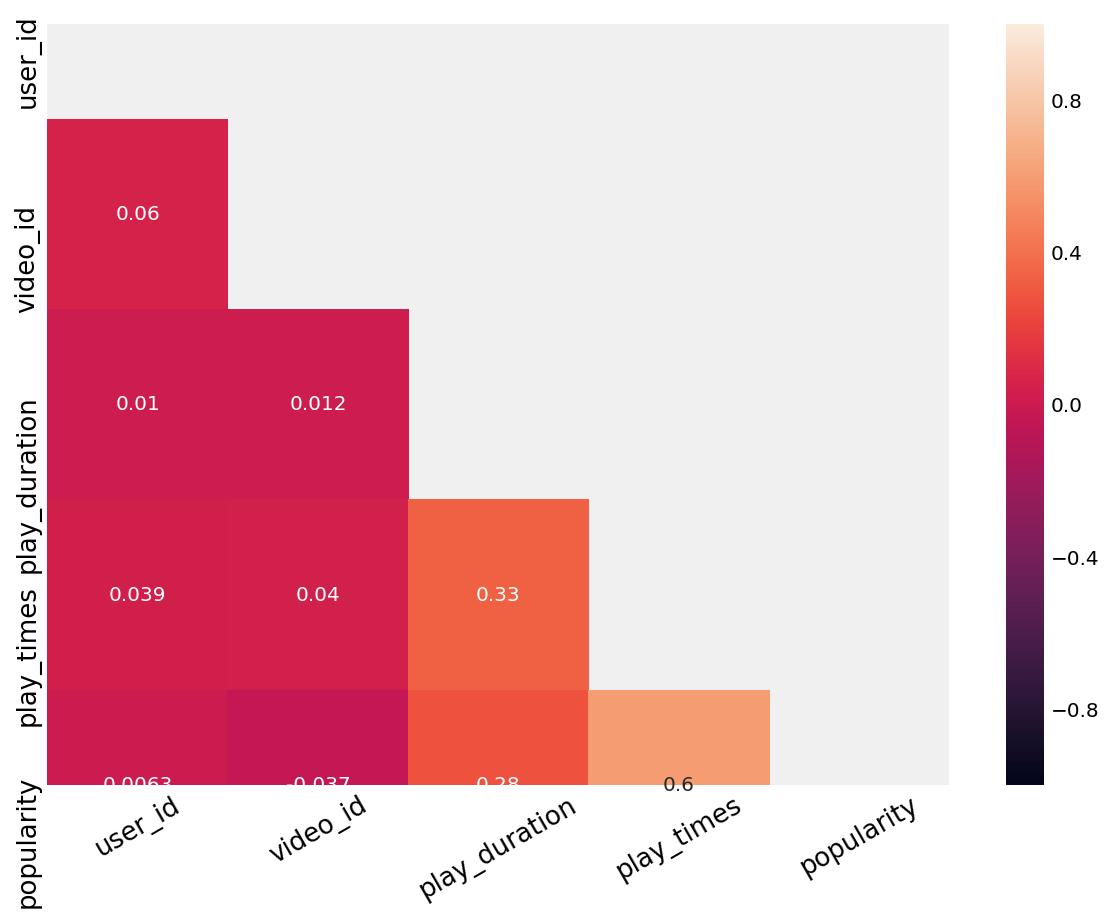

,user_id,video_id,play_duration,play_times,popularity
count,4.39688e+06,4.39688e+06,4.39688e+06,4.39688e+06,4.39688e+06
mean,2.35676e+04,8.94506e+03,5.77948e+01,2.21129e+00,8.51613e-01
std,1.85477e+04,2.57350e+03,5.56206e+02,6.73271e+00,4.95974e+00
min,0.00000e+00,1.87000e+02,0.00000e+00,0.00000e+00,0.00000e+00
25%,0.00000e+00,6.95500e+03,3.00000e+00,1.00000e+00,9.00000e-03
50%,2.50610e+04,9.40900e+03,1.50000e+01,1.00000e+00,3.37000e-01
75%,4.00550e+04,9.93100e+03,5.20000e+01,2.00000e+00,1.13000e+00
max,5.49960e+04,1.51300e+04,3.74581e+05,2.28600e+03,4.77744e+03


,user_id,video_id,end_play_time,play_duration,play_times,popularity
0,0,4912,2019-02-18 21:45:29,7,1,1.400
1,0,5469,2019-02-18 21:45:49,7,1,1.400
2,0,6852,2019-02-18 21:45:41,10,1,2.000
3,0,6939,2019-02-18 21:47:20,8,1,1.333
4,0,6944,2019-02-18 21:44:48,2,1,0.067


,user_id,video_id,end_play_time,play_duration,play_times,popularity
4396880,54996,9409,2019-03-26 23:23:53,26,2,2.366
4396881,54996,9478,2019-03-26 23:23:20,15,2,1.171
4396882,54996,9594,2019-03-26 23:15:57,3,0,0.000
4396883,54996,9619,2019-03-26 23:23:59,3,1,0.052
4396884,54996,9763,2019-03-26 23:24:32,132,10,1.483


In [13]:
data_glimps(v_stats)

In [16]:
# Checking video_id 197 which I am familiar with

In [17]:
v_stats[v_stats['video_id']==197].describe() 

,user_id,video_id,play_duration,play_times,popularity
count,2.00000,2.0,2.00000,2.0,2.0
mean,2371.00000,197.0,661.00000,0.0,0.0
std,199.40411,0.0,578.41335,0.0,0.0
min,2230.00000,197.0,252.00000,0.0,0.0
25%,2300.50000,197.0,456.50000,0.0,0.0
50%,2371.00000,197.0,661.00000,0.0,0.0
75%,2441.50000,197.0,865.50000,0.0,0.0
max,2512.00000,197.0,1070.00000,0.0,0.0


In [85]:
ad_lesson_video[ad_lesson_video['id']==197].describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,1.0,1.0
mean,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0
25%,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0
50%,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0
75%,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0
max,197.0,1060.0,0.0,18391.0,2.0,218.0,0.0,1.747,1123.0,0.0,0.0


In [19]:
# through watching video_id 197，in ad_lesson_video,real_access_time 218，in video_stats,play_times is 0 times.
# as far as I know,218 times is more likely to be true.

In [20]:
# suspicious data, give up 
# vgroup_times=v_stats.groupby("video_id",as_index=False, sort=True).play_times.sum()
# vgroup_times.head(3)

In [21]:
# suspicious data, give up 
# video_info=video_info.merge(vgroup_times, on="video_id", how='outer')

In [15]:
vgroup_duration=v_stats.groupby("video_id",as_index=False, sort=True).play_duration.sum()
vgroup_duration.head(3)

,video_id,play_duration
0,187,2216
1,197,1322
2,198,887


# Using ad_lesson_video as my main dataset for merging

In [22]:
ad_lesson_video_cp=ad_lesson_video.copy()

In [23]:
ad_lesson_video_cp.rename(columns={"id":"video_id"},inplace=True)

In [24]:
ad_lesson_video_cp.head(3)

,video_id,duration,last_modified,title,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
0,187,123,2017-06-06 17:46:36,【自制】吓坏老外的高考,0,52527,0,701,0,15.687,1205,3,0
1,197,1060,2017-06-14 17:50:35,四级考前必背100词-3,0,18391,2,218,0,1.747,1123,0,0
2,198,961,2017-06-15 17:56:43,四级考前必背100词-4,0,23360,2,232,0,1.052,1176,0,0


In [25]:
video_info=vgroup_duration.merge(ad_lesson_video_cp, on='video_id', how='inner')

In [26]:
video_info.shape 

(3225, 14)

In [27]:
video_info_backup=video_info.copy() # make a backup

# The cols I didn't use are: 'last_modified','sort_index','access_times', 'access_type'
# , 'direction',  'favorite_times', 'author_id'

# potential useful cols: 'title' can be used for NLP analysis


In [28]:
video_info.columns

Index(['video_id', 'play_duration', 'duration', 'last_modified', 'title',
       'sort_index', 'access_times', 'access_type', 'real_access_times',
       'direction', 'popularity', 'favorite_times', 'real_favorite_times',
       'author_id'],
      dtype='object')

In [29]:
# massive similar data, only keep the 'real_' ones.
video_info=video_info[['video_id', 'play_duration','title',
                       'duration','real_access_times','popularity','real_favorite_times']]

In [30]:
video_info.rename(columns={'duration':'video_length','real_access_times':'access_times','real_favorite_times':"favorite_times"},inplace=True)

In [31]:
video_info.head(3) # hint,when try to find duplicates, do by one column at a time

,video_id,play_duration,title,video_length,access_times,popularity,favorite_times
0,187,2216,【自制】吓坏老外的高考,123,701,15.687,3
1,197,1322,四级考前必背100词-3,1060,218,1.747,0
2,198,887,四级考前必背100词-4,961,232,1.052,0



Writing an algorithm to see the each video's complete_watching_video_rate, 

In [32]:
# creating 'completion_rate' ,be careful,k/(i*j) has to be（）ed，otherwise the results are wrong
video_info['complete_rate']=[k/(i*j) for k,i,j in zip(video_info["play_duration"],
                                                  video_info['access_times'],
                                                  video_info['video_length'])]

In [33]:
video_info.describe()

,video_id,play_duration,video_length,access_times,popularity,favorite_times,complete_rate
count,3225.00000,3.22500e+03,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000
mean,8244.84496,7.86000e+04,222.22078,7115.10698,724.32511,77.28899,0.15022
std,3700.77757,2.14105e+05,518.56171,18776.04764,2543.35685,281.39888,0.10755
min,187.00000,6.00000e+00,3.00000,7.00000,0.12500,0.00000,0.00043
25%,5766.00000,4.83000e+03,27.00000,647.00000,51.81700,5.00000,0.06952
50%,9300.00000,2.88950e+04,106.00000,2759.00000,173.15500,21.00000,0.11903
75%,10133.00000,7.85550e+04,188.00000,6200.00000,474.61900,59.00000,0.20943
max,15130.00000,5.87947e+06,5452.00000,385368.00000,82040.25000,8607.00000,1.04768


simple truth: low complete_rate videos are mostly academic ones and vocational training ones.

In [86]:
video_info[video_info["complete_rate"]<0.03].title.head(10)

0                 【自制】吓坏老外的高考
1                四级考前必背100词-3
2                四级考前必背100词-4
70         瞬间让作文高大上的连接词「4/13」
74          外语到底有没有必要学？「9/10」
75       女性停车位是对女性的歧视么？「8/10」
79        节日热潮是商家决定的吗？「10/10」
194    过来人告诉你婚前必做的两件事是什么「2/8」
210        相亲时博取好感的杀伤性武器「6/8」
212      最“诡异”的一次相亲，没有之一「8/8」
Name: title, dtype: object

Shape: (3225, 8) 

Types:
 video_id            int64
play_duration       int64
title              object
video_length        int64
access_times        int64
popularity        float64
favorite_times      int64
complete_rate     float64
dtype: object 

isnull:
 video_id          0
play_duration     0
title             0
video_length      0
access_times      0
popularity        0
favorite_times    0
complete_rate     0
dtype: int64 

Columns_names:
 Index(['video_id', 'play_duration', 'title', 'video_length', 'access_times',
       'popularity', 'favorite_times', 'complete_rate'],
      dtype='object') 



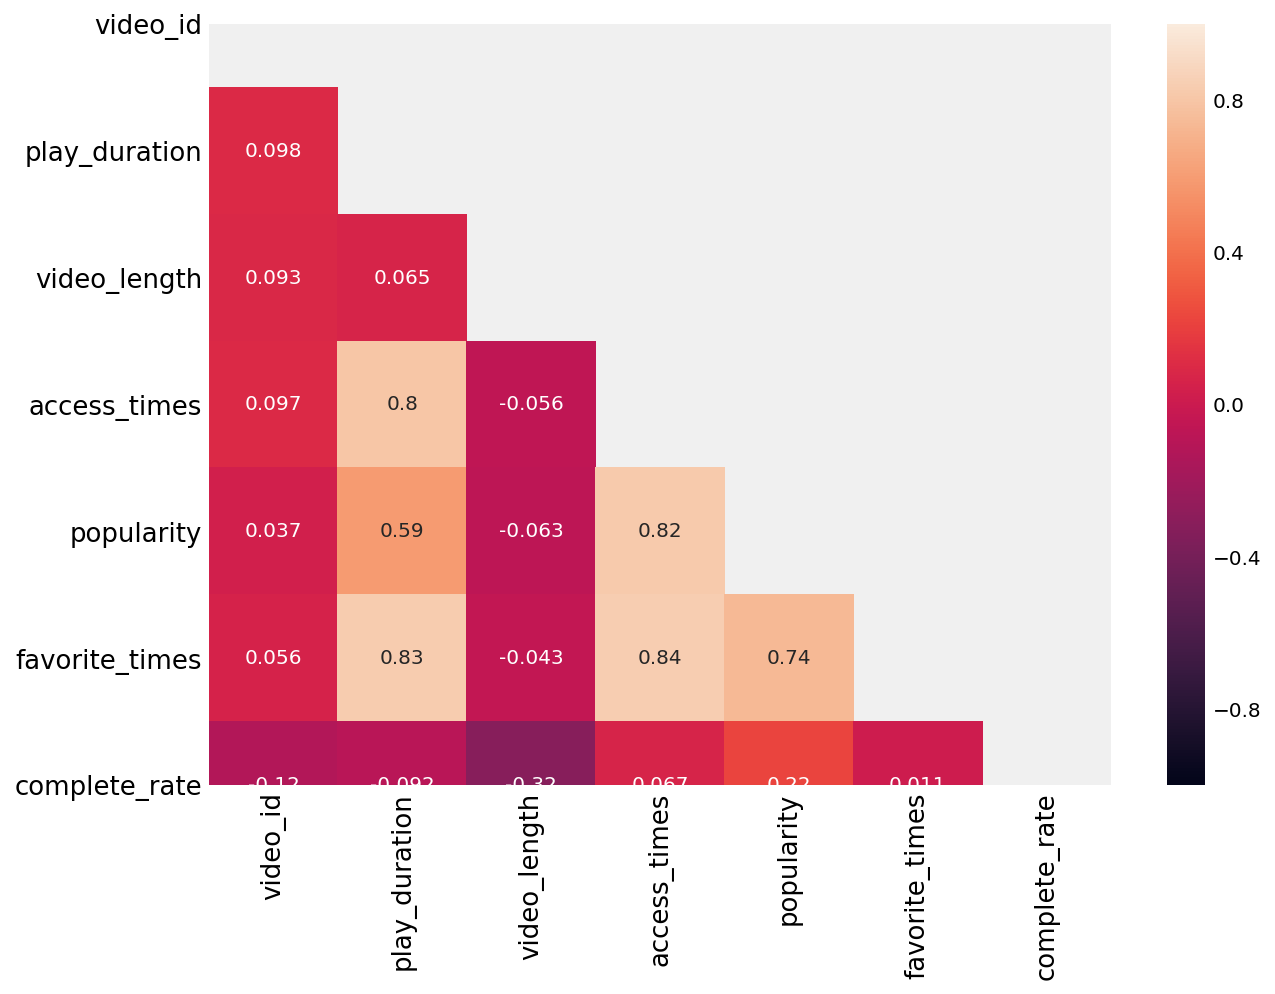

,video_id,play_duration,video_length,access_times,popularity,favorite_times,complete_rate
count,3225.00000,3.22500e+03,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000
mean,8244.84496,7.86000e+04,222.22078,7115.10698,724.32511,77.28899,0.15022
std,3700.77757,2.14105e+05,518.56171,18776.04764,2543.35685,281.39888,0.10755
min,187.00000,6.00000e+00,3.00000,7.00000,0.12500,0.00000,0.00043
25%,5766.00000,4.83000e+03,27.00000,647.00000,51.81700,5.00000,0.06952
50%,9300.00000,2.88950e+04,106.00000,2759.00000,173.15500,21.00000,0.11903
75%,10133.00000,7.85550e+04,188.00000,6200.00000,474.61900,59.00000,0.20943
max,15130.00000,5.87947e+06,5452.00000,385368.00000,82040.25000,8607.00000,1.04768


,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate
0,187,2216,【自制】吓坏老外的高考,123,701,15.687,3,0.02570
1,197,1322,四级考前必背100词-3,1060,218,1.747,0,0.00572
2,198,887,四级考前必背100词-4,961,232,1.052,0,0.00398
3,200,174109,占据高频考点的社会单词,1627,2235,120.498,26,0.04788
4,203,2706,【自制】走过最长的路就是网购折扣中的套路,107,470,76.547,4,0.05381


,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate
3220,15126,232014,4岁小妹妹反思新年计划,114,25769,2769.835,329,0.07898
3221,15127,120283,被最毒的蜘蛛咬伤怎么办？,108,14355,689.303,75,0.07758
3222,15128,200051,可爱小孩回答什么是爱？,130,19129,1027.842,151,0.08045
3223,15129,175182,一枚回形针,55,46162,1887.447,157,0.06900
3224,15130,246616,怎么和宝宝乘飞机？,110,24483,1268.913,98,0.09157


In [35]:
data_glimps(video_info)

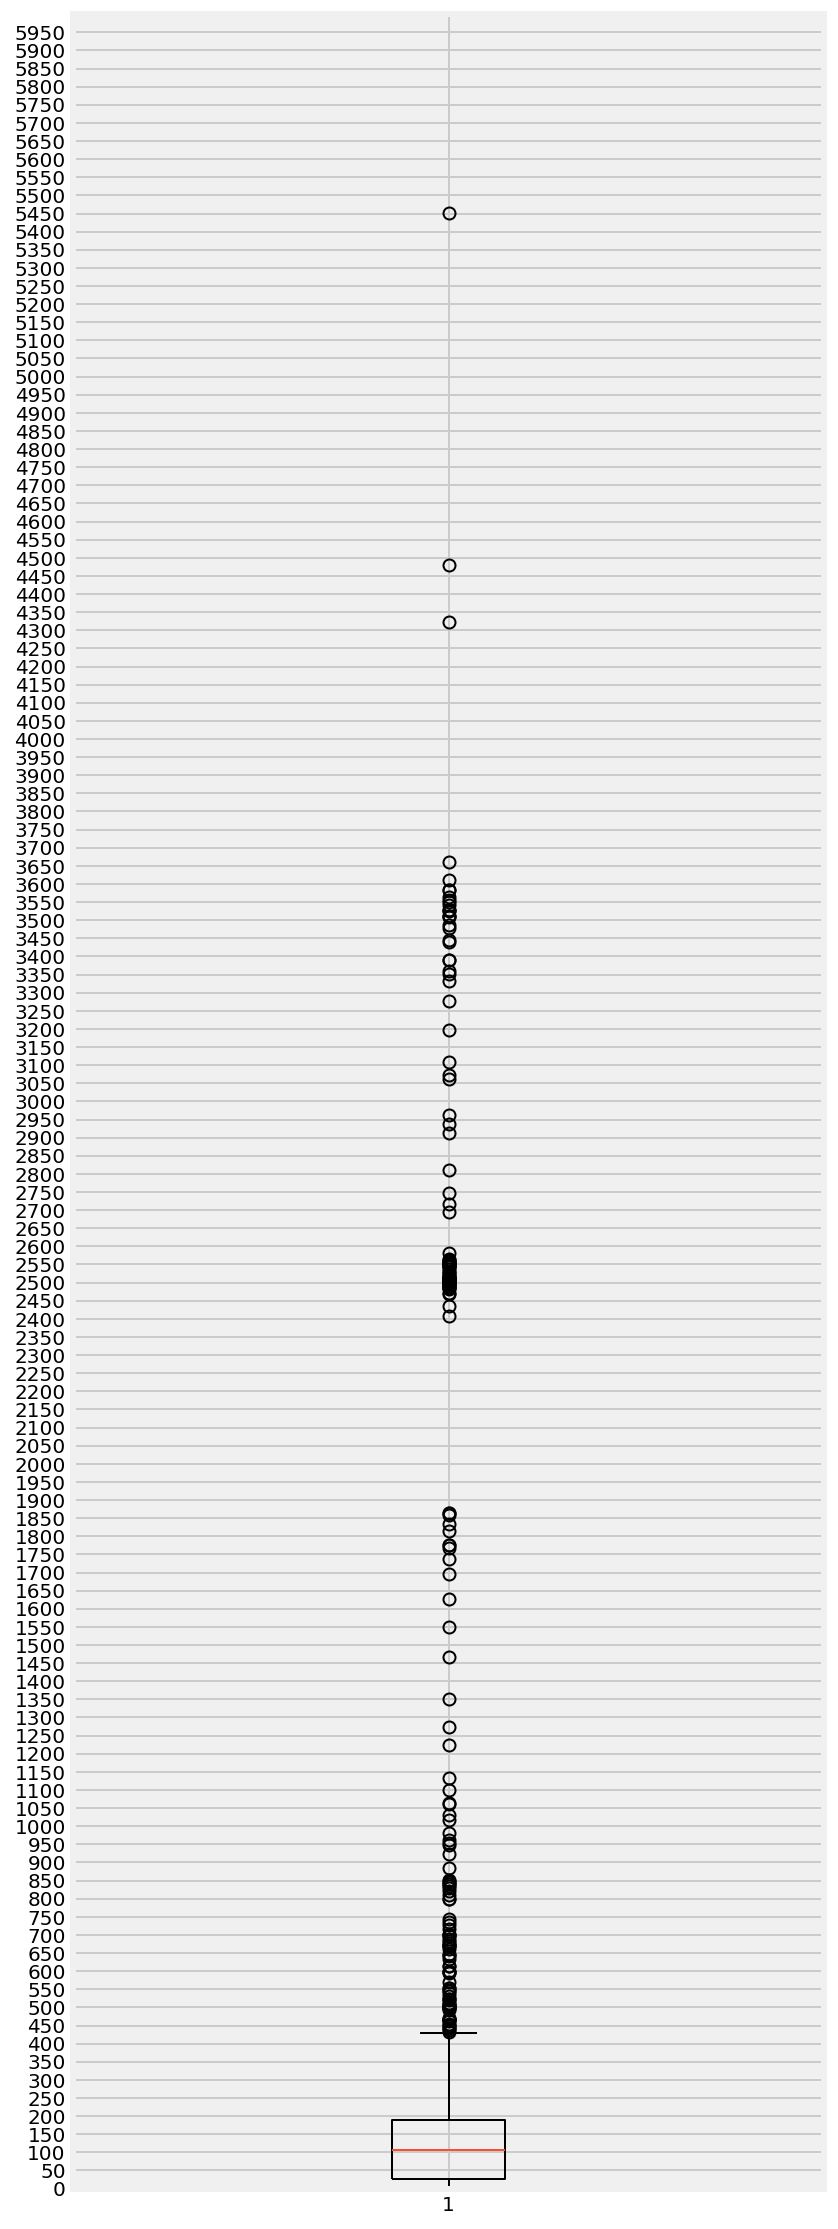

In [36]:
# through different video length, videos can be categorized into 3 categories, tv_series, short_entertainment videos and educational  videos.

fig,ax=plt.subplots(figsize=(6,20))
ax = plt.boxplot(video_info['video_length'])
plt.ylim(0,6000,50)
plt.yticks(np.arange(0, 6000, step=50))
plt.show()


In [37]:
boxplot_num(video_info['video_length'])

Above 429.5 
 Q3 188.0 
 Q2 106.0 
 Q1 27.0 
 Below -214.5


In [38]:
video_info.video_length.describe()

count    3225.00000
mean      222.22078
std       518.56171
min         3.00000
25%        27.00000
50%       106.00000
75%       188.00000
max      5452.00000
Name: video_length, dtype: float64

In [39]:
# educational video length are usually within this range
len(video_info[(video_info["video_length"]<1500) &(video_info["video_length"]>300)]) 

229

In [40]:
# short_entertainment videos
len(video_info[(video_info["video_length"]<300)])

2877

In [41]:
# put labels on videos
catagory=[]
for i in video_info['video_length']:
    if i<300:
        catagory.append(1) # 1 for fun
    elif 300<=i<=1500:
        catagory.append(2) # 2 for education
    else:
        catagory.append(3) # 3 for Tv series

In [42]:
len(catagory)

3225

In [43]:
# create a 'catagory' column in video_info
video_info['catagory']=catagory 

In [44]:
# correct some labels after having a close look on some titles
# 细看title后，修改了一些video的分类
fun=[1966,1594,41,2189,1959,1929,2845,2056,2255,8,1676,591,2990,2402,2768,1574,2870,2743,1655,1408,
    2814,2756,2829,2732,2125,3112,1749,2229,2006,2696,2840,1709,2895,1971,1486,2368,2159,2802,2846,
    1911,2797,2319,2142,2382,2853,254,249,2760,2699,155,2786,331]
edu=[3,300,2705,341,2200,2967,2935,1945,1352,1339,257,159,6,311,229,33,355,1494,1451,153,69,76,1703,1417,
    3088,2987,2996,2939,1591,2160,1509,1382,1343,1563,2983,2985,117,1351,2981,2992,28,2951,3077,
    2910,2988,1662,1590,1663,1561,1577,1598,1605,1609,1620,1640,1641,1642,1643,1647,1648,1650,1659,1660,1661,
    1337,1343,1353,1368,1380,1394,1406,1421,1449,1463,1492,1501,1502,1503,1504,1505,1506,1507,1508,1522,1523,
    1524,15341539,]
tv=[2796,2783,2811,3006,2774,2891]

In [45]:
# manully change some catagories to 1 according to the title
def be_fun(list):
    for i in list:
        video_info.at[i,"catagory"]=1

In [46]:
be_fun(fun)

In [47]:
# manully change some catagories to 2 according to the title
def be_edu(list):
    for i in list:
        video_info.at[i,"catagory"]=2

In [48]:
be_edu(edu)

In [49]:
# manully change some catagories to 3 according to the title
def be_tv_show(list):
    for i in list:
        video_info.at[i,"catagory"]=3

In [50]:
be_tv_show(tv)

In [51]:
video_info.sort_values(by='video_length',ascending=False)

,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate,catagory
2482,10205.0,396496.0,西部世界第二季10,5452.0,2462.0,121.319,7.0,0.02954,3.0
2010,9706.0,1526034.0,西部世界第二季01,4480.0,8352.0,390.176,49.0,0.04078,3.0
2212,9921.0,107431.0,西部世界第二季04,4322.0,1188.0,28.913,3.0,0.02092,3.0
2283,9993.0,118742.0,西部世界第二季05,3661.0,1231.0,54.913,7.0,0.02635,3.0
2090,9799.0,18379.0,亿万第三季06,3610.0,44.0,6.831,1.0,0.11571,3.0
2143,9852.0,93141.0,西部世界第二季03,3582.0,1304.0,38.313,6.0,0.01994,3.0
2864,12630.0,174180.0,[第7集] 当前意识；过去意识；语言；愿景与记忆,3582.0,3515.0,110.208,16.0,0.01383,3.0
2340,10050.0,129517.0,西部世界第二季06,3563.0,1005.0,38.265,7.0,0.03617,3.0
2373,10083.0,161439.0,西部世界第二季07,3557.0,1246.0,33.022,3.0,0.03643,3.0
2459,10182.0,116778.0,西部世界第二季09,3550.0,1073.0,43.012,4.0,0.03066,3.0


In [52]:
# merged words_video_favorite into video_info, however, words_video_favorite and favorite_times are the same, give it up

# words_favorite=groupby_count(words_video_favorite,'video_id').loc[:,'video_id':'user_id']

# words_favorite.rename(columns={"user_id":"words_favorite"},inplace=True)

# len(words_favorite)

# video_info=video_info.merge(words_favorite, on="video_id", how='left')

# video_info.head()

# video_info.describe()


In [54]:
video_comment_counts=words_video_comment.loc[:,'target_id':'usr_id']

In [55]:
video_comment_counts.rename(columns={"target_id":'video_id','usr_id':'comment_counts'}, inplace=True)

In [56]:
video_comment_counts=groupby_count(video_comment_counts,'video_id')

In [60]:
# replace all non-numeric ones with 0, then, change the type of the column
for i in video_comment_counts.video_id:
    if i.isnumeric() != True:
        video_comment_counts.video_id=video_comment_counts.video_id.replace(i,0)

In [61]:
video_comment_counts.video_id=video_comment_counts.video_id.astype('int64')

In [87]:
video_comment_counts.head(3)

,video_id,comment_counts
0,0,0
1,0,1
2,0,0


In [63]:
video_comment_counts.dtypes

video_id          int64
comment_counts    int64
dtype: object

In [64]:
# merging video_comment_counts and video_info
video_info=video_info.merge(video_comment_counts, on='video_id', how="left")

In [65]:
#替换NaN成0，再看看dtypes

In [66]:
video_info['comment_counts']=video_info['comment_counts'].replace(np.nan,0)

Shape: (3226, 10) 

Types:
 video_id          float64
play_duration     float64
title              object
video_length      float64
access_times      float64
popularity        float64
favorite_times    float64
complete_rate     float64
catagory          float64
comment_counts    float64
dtype: object 

isnull:
 video_id          1
play_duration     1
title             1
video_length      1
access_times      1
popularity        1
favorite_times    1
complete_rate     1
catagory          0
comment_counts    0
dtype: int64 

Columns_names:
 Index(['video_id', 'play_duration', 'title', 'video_length', 'access_times',
       'popularity', 'favorite_times', 'complete_rate', 'catagory',
       'comment_counts'],
      dtype='object') 



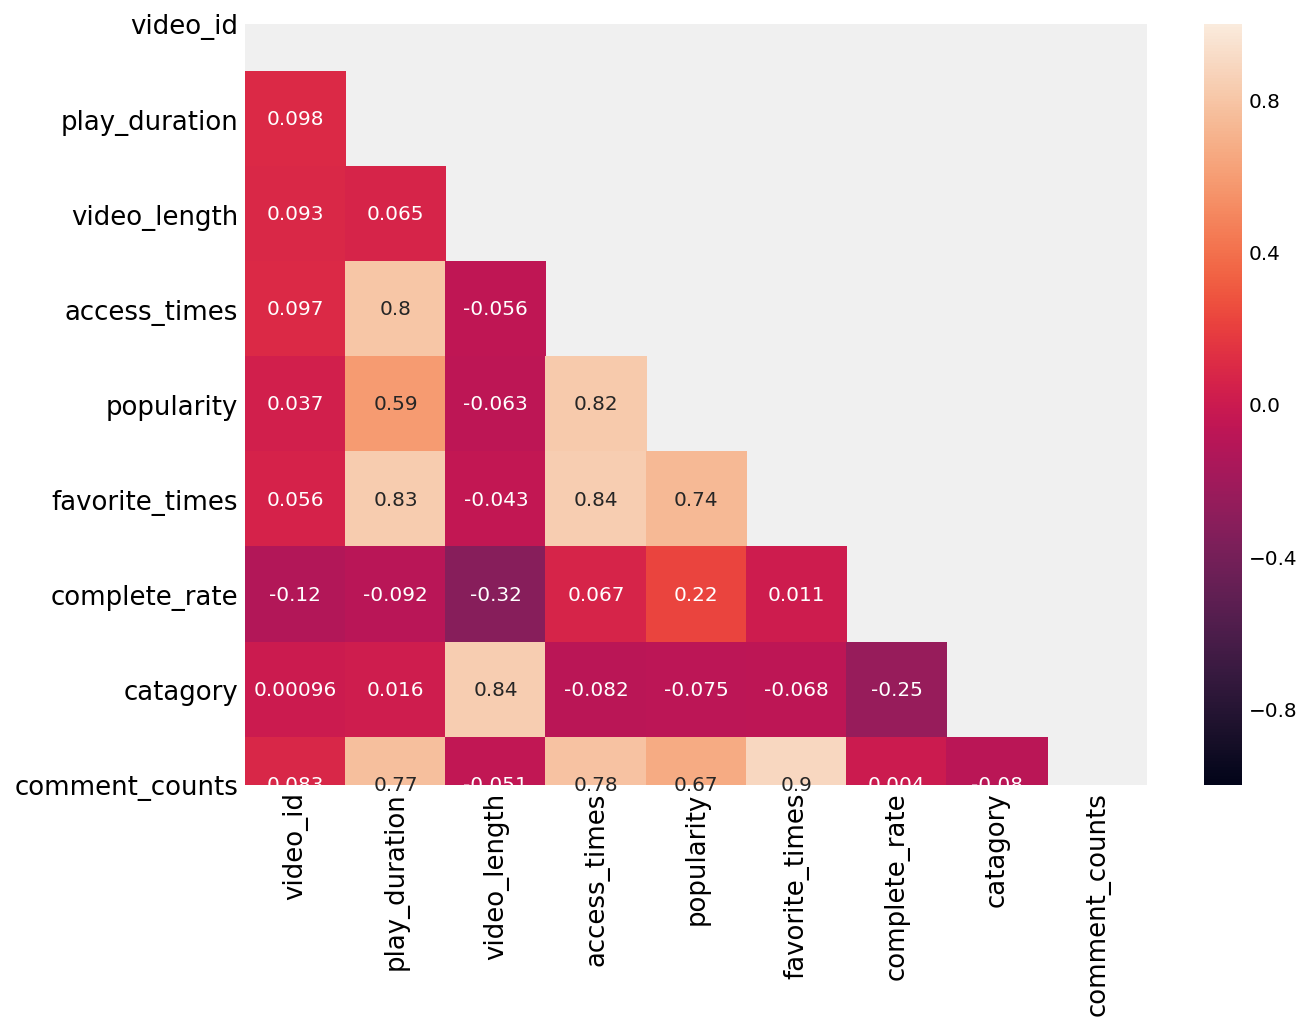

,video_id,play_duration,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
count,3225.00000,3.22500e+03,3225.00000,3225.00000,3225.00000,3225.00000,3225.00000,3226.00000,3226.00000
mean,8244.84496,7.86000e+04,222.22078,7115.10698,724.32511,77.28899,0.15022,1.15592,4.96311
std,3700.77757,2.14105e+05,518.56171,18776.04764,2543.35685,281.39888,0.10755,0.45531,14.37848
min,187.00000,6.00000e+00,3.00000,7.00000,0.12500,0.00000,0.00043,1.00000,0.00000
25%,5766.00000,4.83000e+03,27.00000,647.00000,51.81700,5.00000,0.06952,1.00000,0.00000
50%,9300.00000,2.88950e+04,106.00000,2759.00000,173.15500,21.00000,0.11903,1.00000,2.00000
75%,10133.00000,7.85550e+04,188.00000,6200.00000,474.61900,59.00000,0.20943,1.00000,5.00000
max,15130.00000,5.87947e+06,5452.00000,385368.00000,82040.25000,8607.00000,1.04768,3.00000,525.00000


,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
0,187.0,2216.0,【自制】吓坏老外的高考,123.0,701.0,15.687,3.0,0.02570,1.0,0.0
1,197.0,1322.0,四级考前必背100词-3,1060.0,218.0,1.747,0.0,0.00572,2.0,0.0
2,198.0,887.0,四级考前必背100词-4,961.0,232.0,1.052,0.0,0.00398,2.0,0.0
3,200.0,174109.0,占据高频考点的社会单词,1627.0,2235.0,120.498,26.0,0.04788,2.0,1.0
4,203.0,2706.0,【自制】走过最长的路就是网购折扣中的套路,107.0,470.0,76.547,4.0,0.05381,1.0,0.0


,video_id,play_duration,title,video_length,access_times,popularity,favorite_times,complete_rate,catagory,comment_counts
3221,15127.0,120283.0,被最毒的蜘蛛咬伤怎么办？,108.0,14355.0,689.303,75.0,0.07758,1.0,5.0
3222,15128.0,200051.0,可爱小孩回答什么是爱？,130.0,19129.0,1027.842,151.0,0.08045,1.0,11.0
3223,15129.0,175182.0,一枚回形针,55.0,46162.0,1887.447,157.0,0.06900,1.0,8.0
3224,15130.0,246616.0,怎么和宝宝乘飞机？,110.0,24483.0,1268.913,98.0,0.09157,1.0,4.0
3225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0


In [67]:
data_glimps(video_info)

In [88]:
video_info.dropna(inplace=True) 

In [ ]:
# although the correlation between some features are sill high, but I believe this is so far the best dateset I can get.
# Will try different combos in the modeling phase